<a href="https://colab.research.google.com/github/pietrapaz/learning_Python/blob/main/avaliacaoNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 106.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [ ]:
!pip install pygal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pygal
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
from vega_datasets import data

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/imagensProjetos/heart.csv')

In [ ]:
heart['Heart Disease'] = heart['Heart Disease'].apply(lambda x: 0 if x == 'Absence' else 1)
display(heart)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
dados = heart [['Age', 'Sex', 'Chest pain type',	'BP', 'Cholesterol', 'FBS over 120',	'EKG results',	'Max HR',	'Exercise angina',	'ST depression',
              'Slope of ST',	'Number of vessels fluro',	'Thallium',	'Heart Disease']]

In [ ]:
data1 = ["Age", "Sex", "Chest pain type", "BP"]
fig = px.scatter_matrix(heart, dimensions=data1, color="Heart Disease")
fig.show()

In [ ]:
data2 = ["Cholesterol", "FBS over 120", "EKG results", "Max HR"]
fig = px.scatter_matrix(heart, dimensions=data2, color="Heart Disease")
fig.show()

In [ ]:
data3 = ["Exercise angina", "ST depression", "Slope of ST", "Number of vessels fluro", "Thallium"]
fig = px.scatter_matrix(heart, dimensions=data3, color="Heart Disease")
fig.show()

In [ ]:
# colesterol por idade
fig = px.scatter(heart, x = 'Age', y = 'Cholesterol', title = 'Age vs Cholesterol', color = 'Heart Disease')
fig.show()

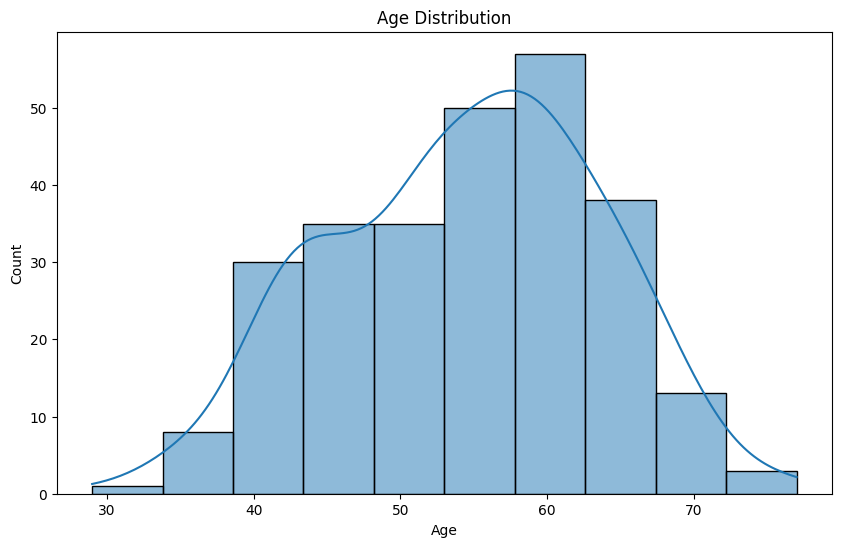

In [ ]:
# idade
plt.figure(figsize=(10, 6))
sns.histplot(data=heart, x="Age", bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

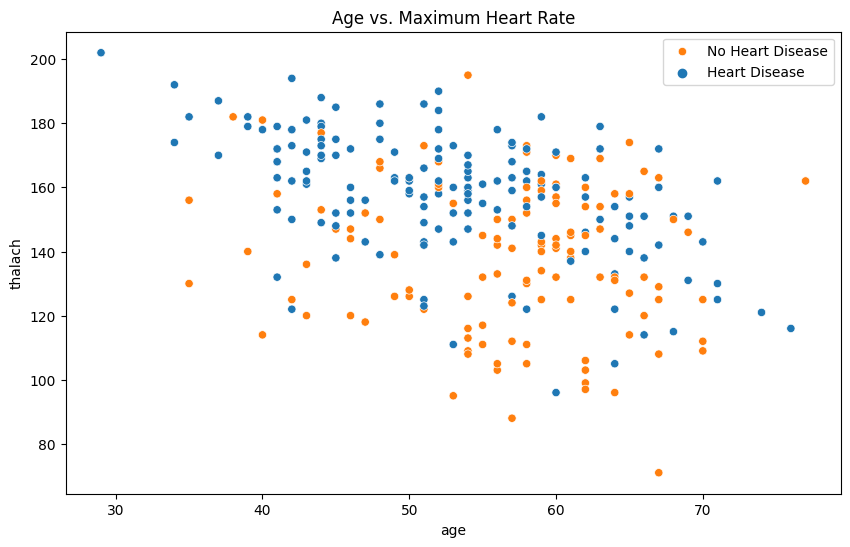

In [ ]:
# idade pela frequencia cardiaca maxima
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart, x="Age", y="Max HR", hue="Heart Disease", color = "Heart Disease")
plt.title("Age vs. Maximum Heart Rate")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

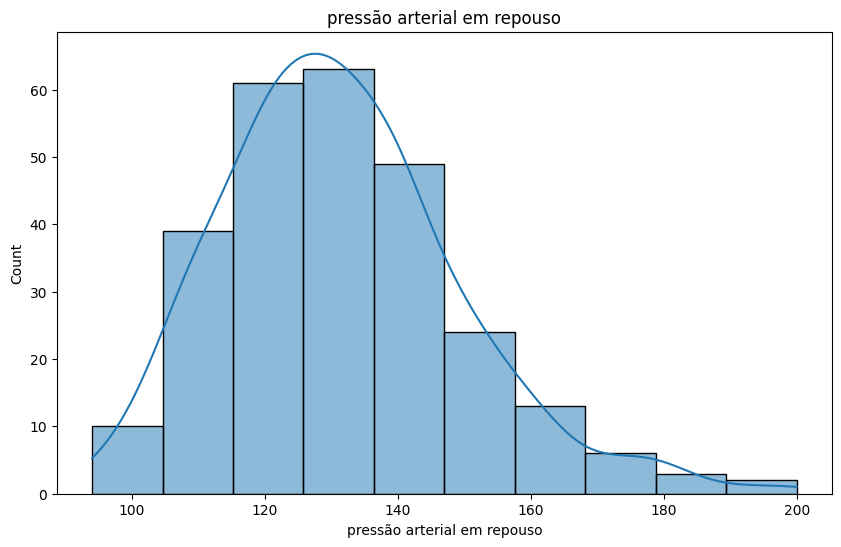

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heart, x="BP", bins=10, kde=True)
plt.title("pressão arterial em repouso")
plt.xlabel("pressão arterial em repouso")
plt.ylabel("Count")
plt.show()

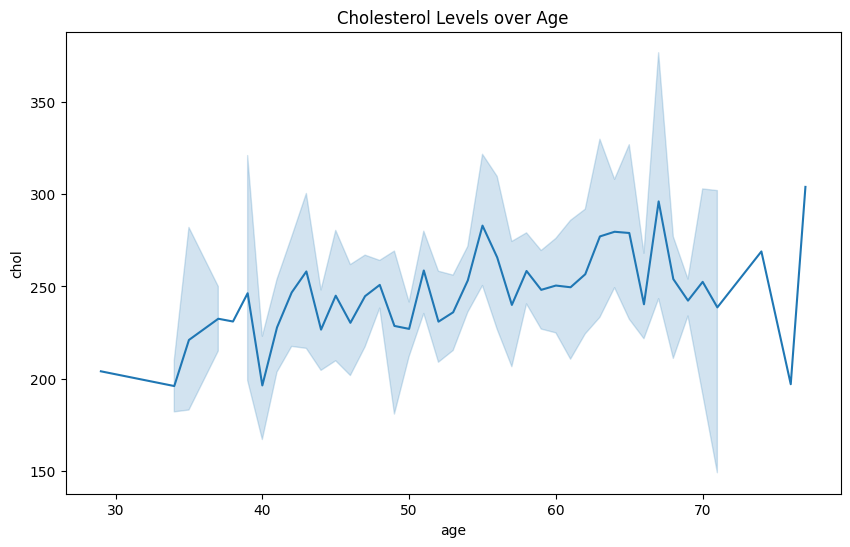

In [ ]:
# nivel de colesterol por idade
plt.figure(figsize=(10, 6))
sns.lineplot(data=heart, x="Age", y="Cholesterol")
plt.title("Cholesterol Levels over Age")
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

In [ ]:
px.pie(heart, dados = 'Sex', color='Heart Disease')

NameError: ignored

In [ ]:
dados = ['Age', 'Sex', 'Chest pain type',	'BP', 'Cholesterol', 'FBS over 120',	'EKG results',	'Max HR',	'Exercise angina',	'ST depression',
              'Slope of ST',	'Number of vessels fluro',	'Thallium',	'Heart Disease']
data = heart[dados].mean().tolist()

# Create a radar chart
radar_chart = pygal.Radar(fill=True)
radar_chart.title = 'Heart Disease Radar Chart'
radar_chart.x_labels = dados
radar_chart.add('Average', data)
radar_chart.render_in_browser()

file:///tmp/tmp29ww0p83.html


In [ ]:
# separacao das variaveis
X = heart.drop('Heart Disease', axis=1)
y = heart['Heart Disease']

In [ ]:
# separacao de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
# treinamento modelo bayesiano
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# vetor de predicao
y_pred = gnb.predict(X_test)
y_trai = gnb.predict(X_train)

In [ ]:
# comparação de valores de teste (y_test) com valores preditos (y_pred)
from sklearn import metrics
print("Acurácia do modelo Naive Bayes Gaussiano(em %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Acurácia do modelo Treinamento(em %):", metrics.accuracy_score(y_train, y_trai)*100)

Acurácia do modelo Naive Bayes Gaussiano(em %): 88.88888888888889
Acurácia do modelo Treinamento(em %): 86.0082304526749


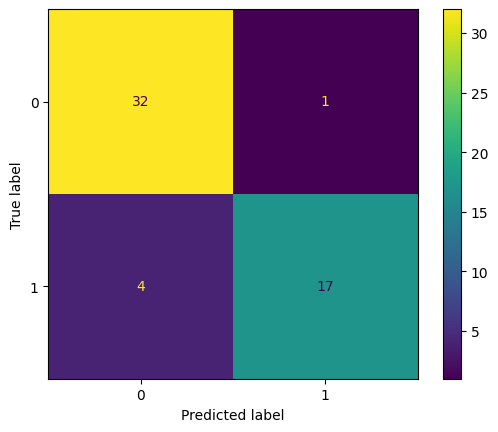

In [ ]:
# matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_test, y_pred)
matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao).plot()